In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Ler os dados
BaseDados = pd.read_csv('Startups in 2021 end.csv')

#verificar dimensão
BaseDados.shape

(936, 8)

In [ ]:
#Primeiros registros
BaseDados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
BaseDados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
#Renomear as colunas para portugues
BaseDados.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)': 'Valor',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'País',
    'City':'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

In [ ]:
BaseDados.info() #tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor           936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   País            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#Verificar se campo é nulo
BaseDados.isnull()

,Id,Empresa,Valor,Data de Adesão,País,Cidade,Setor,Investidores
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
931,False,False,False,False,False,False,False,False
932,False,False,False,False,False,False,False,False
933,False,False,False,False,False,False,False,False
934,False,False,False,False,False,False,False,False


In [ ]:
#Somando so campos nulos
BaseDados.isnull().sum()

,0
Id,0
Empresa,0
Valor,0
Data de Adesão,0
País,0
Cidade,15
Setor,0
Investidores,1


In [ ]:
#Campos unicos - mostrando quantos campos unicos cada coluna tem
BaseDados.nunique()

,0
Id,936
Empresa,935
Valor,192
Data de Adesão,589
País,47
Cidade,239
Setor,17
Investidores,920


In [ ]:
#Ranking de valores únicos
BaseDados['Setor'].value_counts()

,count
Setor,
Fintech,190
Internet software & services,167
E-commerce & direct-to-consumer,102
Artificial intelligence,69
Health,63
"Supply chain, logistics, & delivery",51
Other,51
Cybersecurity,41
Mobile & telecommunications,37


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Fintech'),
  Text(1, 0, 'Internet software & services'),
  Text(2, 0, 'E-commerce & direct-to-consumer'),
  Text(3, 0, 'Artificial intelligence'),
  Text(4, 0, 'Health'),
  Text(5, 0, 'Supply chain, logistics, & delivery'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'Cybersecurity'),
  Text(8, 0, 'Mobile & telecommunications'),
  Text(9, 0, 'Data management & analytics'),
  Text(10, 0, 'Hardware'),
  Text(11, 0, 'Auto & transportation'),
  Text(12, 0, 'Edtech'),
  Text(13, 0, 'Consumer & retail'),
  Text(14, 0, 'Travel'),
  Text(15, 0, 'Artificial Intelligence'),
  Text(16, 0, 'Finttech')])

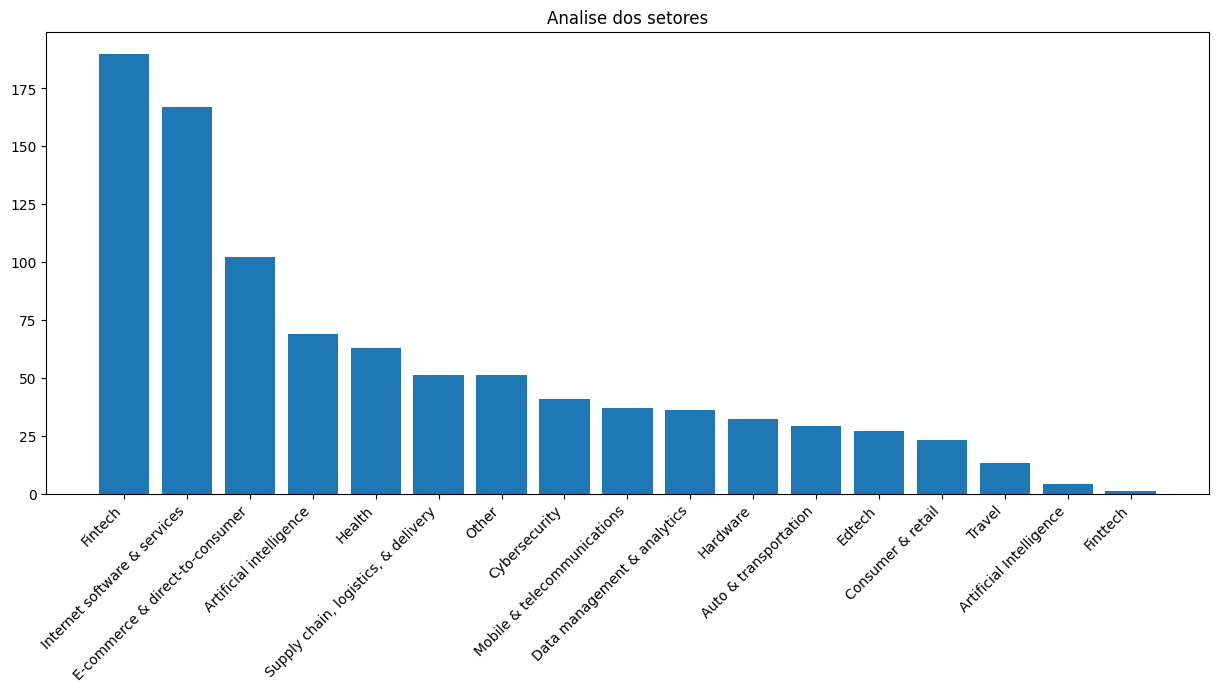

In [ ]:
plt.figure( figsize = (15,6)) #Tamanho da imagem
plt.title('Analise dos setores')
plt.bar( BaseDados['Setor'].value_counts().index, BaseDados['Setor'].value_counts());
plt.xticks(rotation=45, ha='right') #Rotacionar as palavras embaixo

In [ ]:
Analise = round(BaseDados['País'].value_counts(normalize=True) *100,1) #coloca o value counts em porcentagem, depois arredonda pra 100 e o round arredonda em uma casa

In [ ]:
BaseDados['País']

,País
0,China
1,United States
2,United States
3,Sweden
4,Australia
...,...
931,United States
932,United States
933,United States
934,United States


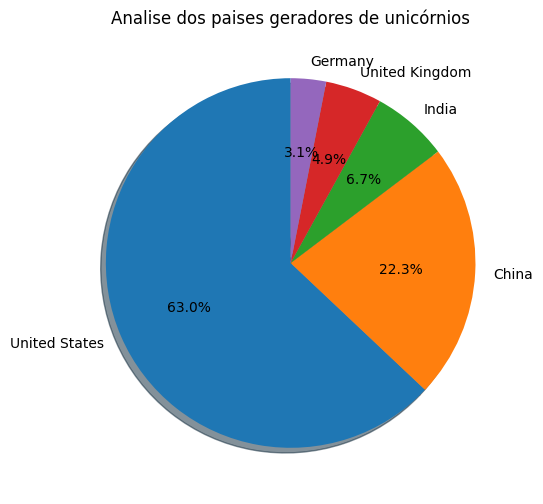

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Analise dos paises geradores de unicórnios')
plt.pie(
    Analise.head(5), #pega os 5 primeiros paises
    labels= Analise.index[0:5],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#Conversão para tipo Data
BaseDados['Data de Adesão'] = pd.to_datetime(BaseDados['Data de Adesão'])
BaseDados['Data de Adesão'].head()

,Data de Adesão
0,2017-04-07
1,2012-12-01
2,2014-01-23
3,2011-12-12
4,2018-01-08


In [ ]:
#Extrair o ano e mês
BaseDados['Mes']=pd.DatetimeIndex(BaseDados['Data de Adesão']).month
BaseDados['Ano']=pd.DatetimeIndex(BaseDados['Data de Adesão']).year

BaseDados.head()

,Id,Empresa,Valor,Data de Adesão,País,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela para selecionar empresas, agrupando por mes e ano e mostrando a coluna ID

Analise_agrupada = BaseDados.groupby(by=['País', 'Ano', 'Mes','Empresa']).count()['Id'].reset_index()

In [ ]:
#Mostrando os unicórnios do brasil por ano e mes
Analise_agrupada.loc[
    Analise_agrupada['País'] == 'Brazil'
]

,País,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [ ]:
BaseDados['Valor'] = pd.to_numeric(BaseDados['Valor'].apply(lambda linha: linha.replace('$', ''))) #tirando o $ de dentro da linha para deixar só o numero e ai convertendoe em float

AttributeError: 'float' object has no attribute 'replace'

In [ ]:
Analisegroup = BaseDados[['País', 'Valor']] #Selecionando apenas o País e valor de mercado dos Unicórnios

In [ ]:
#Vendo quanto cada país tem de valor nos unicornios
Analisegroup = Analisegroup.groupby( by=['País'] ).sum()['Valor'].reset_index()

In [ ]:
Analisevalorgraf = Analisegroup.sort_values( 'Valor', ascending=False) #Ordenando os valores em ordem decrescente

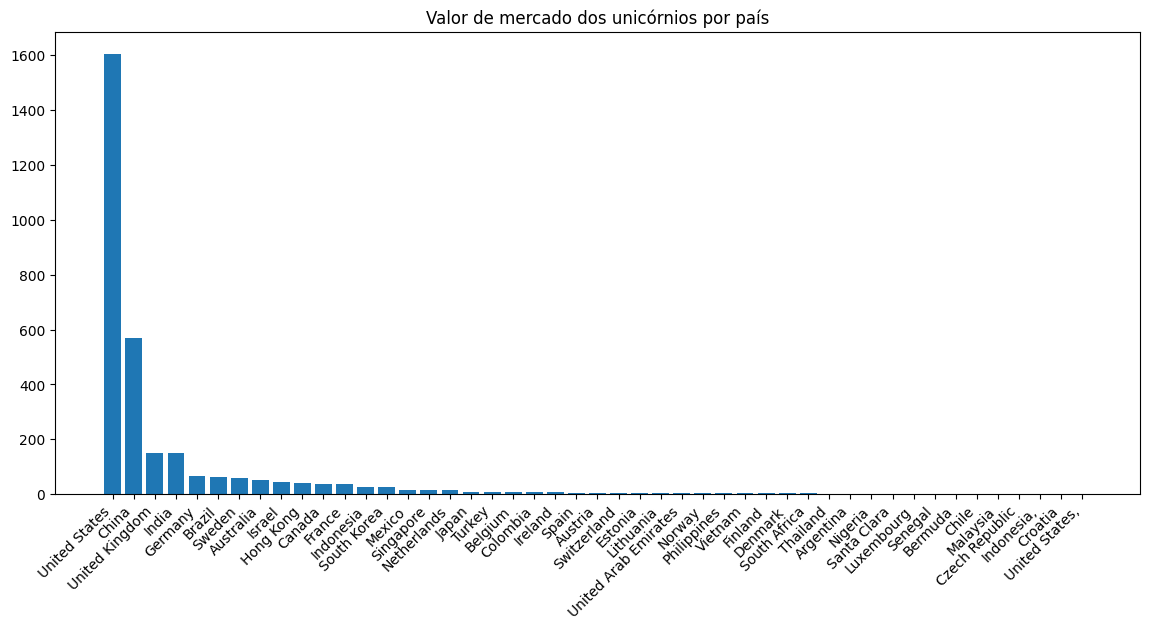

In [ ]:
#Gráfico dos valores
plt.figure(figsize=(14,6))
plt.title('Valor de mercado dos unicórnios por país')
plt.bar(Analisevalorgraf['País'], Analisevalorgraf['Valor'])
plt.xticks(rotation=45, ha='right'); #Rotação dos nomes em 45 graus